## **Table of Contents:**
* [Kerbs Data](#1)
* [Gradient Boosting](#2)
* [Model on Fake Data](#3)

In [6]:
pip install recordlinkage

In [7]:
import recordlinkage
import pandas as pd

In [8]:
from recordlinkage.datasets import load_krebsregister
krebs_data, krebs_match =load_krebsregister()

## Kerbs Data <a name="1"></a>

In [9]:
krebs_data.head(10)

,,cmp_firstname1,cmp_firstname2,cmp_lastname1,cmp_lastname2,cmp_sex,cmp_birthday,cmp_birthmonth,cmp_birthyear,cmp_zipcode
id1,id2,,,,,,,,,
22161,38467,1.000000,NaN,0.142857,NaN,1,0.0,1.0,0.0,0.0
38713,75352,0.000000,NaN,0.571429,NaN,1,0.0,0.0,0.0,0.0
13699,32825,0.166667,NaN,0.000000,NaN,0,1.0,1.0,1.0,0.0
22709,37682,0.285714,NaN,1.000000,NaN,1,0.0,0.0,0.0,0.0
2342,69060,0.250000,NaN,0.125000,NaN,1,1.0,1.0,1.0,0.0
49596,92145,1.000000,NaN,0.000000,NaN,1,0.0,1.0,0.0,0.0
13092,95695,1.000000,NaN,0.142857,NaN,1,0.0,0.0,1.0,0.0
1151,45872,0.400000,NaN,0.555556,NaN,1,0.0,1.0,0.0,0.0
1732,38913,0.444444,NaN,1.000000,NaN,1,0.0,1.0,0.0,1.0


In [10]:
krebs_data.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 5749132 entries, (22161, 38467) to (11651, 57925)
Data columns (total 9 columns):
 #   Column          Dtype  
---  ------          -----  
 0   cmp_firstname1  float64
 1   cmp_firstname2  float64
 2   cmp_lastname1   float64
 3   cmp_lastname2   float64
 4   cmp_sex         int64  
 5   cmp_birthday    float64
 6   cmp_birthmonth  float64
 7   cmp_birthyear   float64
 8   cmp_zipcode     float64
dtypes: float64(8), int64(1)
memory usage: 444.1 MB


In [11]:
krebs_data.isna().sum()

cmp_firstname1       1007
cmp_firstname2    5645434
cmp_lastname1           0
cmp_lastname2     5746668
cmp_sex                 0
cmp_birthday          795
cmp_birthmonth        795
cmp_birthyear         795
cmp_zipcode         12843
dtype: int64

In [12]:
#as cmp_firstname2,cmp_lastname2 is empty for the major portion dropping it
krebs_data.drop(['cmp_firstname2','cmp_lastname2'],axis=1,inplace=True)

In [13]:
krebs_data.dropna(inplace=True)

In [14]:
krebs_data.isna().sum()


cmp_firstname1    0
cmp_lastname1     0
cmp_sex           0
cmp_birthday      0
cmp_birthmonth    0
cmp_birthyear     0
cmp_zipcode       0
dtype: int64

In [15]:
krebs_data.cmp_zipcode.value_counts()

0.0    5702786
1.0      31702
Name: cmp_zipcode, dtype: int64

In [16]:
krebs_data['Target']=krebs_data.index.isin(krebs_match)
krebs_data['Target']=krebs_data['Target'].astype(int)

data=krebs_data.reset_index(drop=True)
X=data.drop(['Target'],axis=1)
Y=data['Target']

## Gradient Boosting <a name="2"></a>

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,random_state=42,test_size=0.2)


from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1,max_depth=3, random_state=42).fit(X_train, y_train)

In [18]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
y_pred=clf.predict(X_test)
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1142811
           1       1.00      1.00      1.00      4087

    accuracy                           1.00   1146898
   macro avg       1.00      1.00      1.00   1146898
weighted avg       1.00      1.00      1.00   1146898



[3.56516525e-03 8.36888718e-02 8.60890101e-07 3.43351685e-01
 2.57256057e-02 5.27954093e-03 5.38388270e-01]


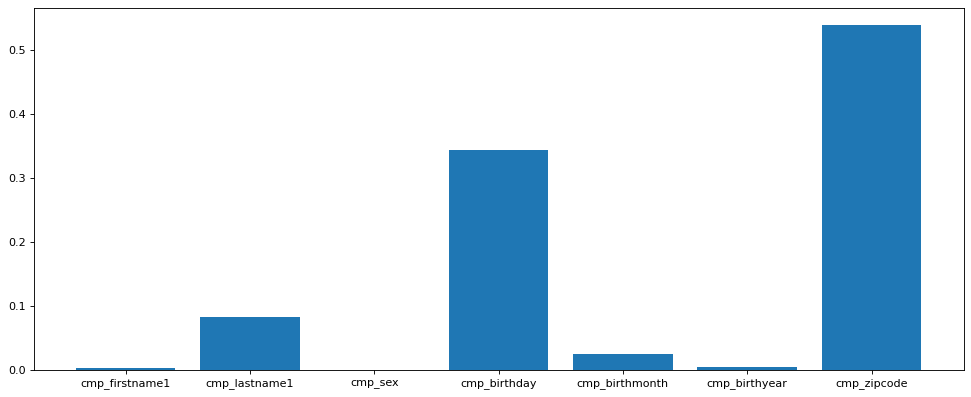

In [19]:
import matplotlib.pyplot as plt

print(clf.feature_importances_)

plt.figure(figsize=(15, 6), dpi=80)
plt.bar(list(X_train.columns), clf.feature_importances_)
plt.show()

In [20]:
pip install Faker

     |████████████████████████████████| 1.5 MB 5.2 MB/s 


## Model on Fake Data <a name="3"></a>

In [21]:
from faker import Faker
fake = Faker(42)
import datetime
import random
start_date = datetime.date(1920, 1, 1)
end_date = datetime.date(2000, 1, 1)

time_between_dates = end_date - start_date
days_between_dates = time_between_dates.days
random_number_of_days = random.randrange(days_between_dates)
def data_creation(entries):
    cmp_firstname1 = []
    cmp_lastname1 = []
    cmp_sex=[]
    cmp_birthday=[]
    cmp_birthmonth=[]
    cmp_birthyear=[]
    cmp_zipcode = []
    
    for q in range(entries):
        cmp_firstname1.append(fake.first_name())
        cmp_lastname1.append(fake.last_name())
        cmp_sex.append(random.randint(0, 1))
        random_number_of_days = random.randrange(days_between_dates)
        random_date = start_date + datetime.timedelta(days=random_number_of_days)
        cmp_birthday.append(random_date.day)
        cmp_birthmonth.append(random_date.month)
        cmp_birthyear.append(random_date.year)
        cmp_zipcode.append(fake.postcode())

        
    df = pd.DataFrame(list(zip(cmp_firstname1, cmp_lastname1, cmp_sex, cmp_birthday, cmp_birthmonth, cmp_birthyear,  cmp_zipcode)), 
                      columns= ['cmp_firstname1', 'cmp_lastname1', 'cmp_sex', 'cmp_birthday', 'cmp_birthmonth', 'cmp_birthyear',  'cmp_zipcode'])
    return df

In [22]:
data_sample=data_creation(entries=10000)


In [23]:
data_sample.head(10)

,cmp_firstname1,cmp_lastname1,cmp_sex,cmp_birthday,cmp_birthmonth,cmp_birthyear,cmp_zipcode
0,Gary,Bryant,1,16,11,1960,47813
1,Michelle,Keller,0,25,10,1970,68400
2,Emily,Holloway,0,10,2,1974,40830
3,Angela,Hayes,0,12,3,1997,35387
4,Martin,Wilcox,1,15,7,1970,71480
5,Christie,Harrison,1,20,3,1963,69507
6,Angela,Bradshaw,1,6,3,1948,95395
7,Joseph,Garza,1,11,11,1927,20183
8,Charles,Huang,0,23,2,1973,09620
9,David,Jordan,0,16,9,1999,35431


In [24]:
data_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   cmp_firstname1  10000 non-null  object
 1   cmp_lastname1   10000 non-null  object
 2   cmp_sex         10000 non-null  int64 
 3   cmp_birthday    10000 non-null  int64 
 4   cmp_birthmonth  10000 non-null  int64 
 5   cmp_birthyear   10000 non-null  int64 
 6   cmp_zipcode     10000 non-null  object
dtypes: int64(4), object(3)
memory usage: 547.0+ KB


In [25]:
from recordlinkage import Compare
def data1(dfA,dfB,blocker=""):
  indexer = recordlinkage.Index()
  if blocker!="":
    indexer.block(blocker)
    candidate_links = indexer.index(dfA, dfB)
  else:
    a=list(dfA.index)
    b=list(dfB.index)
    candidate_links=pd.MultiIndex.from_product([a,b])  
  compare = Compare()
  compare.exact('cmp_sex', 'cmp_sex', label="cmp_sex")
  compare.exact('cmp_birthday', 'cmp_birthday', label='cmp_birthday')
  compare.exact('cmp_birthmonth', 'cmp_birthmonth', label='cmp_birthmonth')
  compare.exact('cmp_birthyear', 'cmp_birthyear', label="cmp_birthyear")
  compare.exact('cmp_zipcode', 'cmp_zipcode', label='cmp_zipcode')
  compare.string('cmp_firstname1', 'cmp_firstname1', method='jarowinkler', label="cmp_firstname1")
  compare.string('cmp_lastname1', 'cmp_lastname1', method='jarowinkler', label="cmp_lastname1")

  features = compare.compute(candidate_links, dfA, dfB)
  return features

In [26]:
dfA1=data_sample
dfB1=data_sample
dfA1["initials"] = (dfA1["cmp_firstname1"].str[0]  + dfA1["cmp_lastname1"].str[0])
dfB1["initials"] = (dfB1["cmp_firstname1"].str[0]  + dfB1["cmp_lastname1"].str[0])
features=data1(dfA1,dfB1,"initials")

In [27]:
features['Match']=clf.predict_proba(features)[:,1]

features.reset_index(inplace=True)
features=features[features["level_0"]!=features["level_1"]]

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


In [28]:
features.sort_values(['Match'],ascending=False,inplace=True)
features.head(6)

,level_0,level_1,cmp_sex,cmp_birthday,cmp_birthmonth,cmp_birthyear,cmp_zipcode,cmp_firstname1,cmp_lastname1,Match
181617,7546,5410,1,1,1,0,0,0.625000,0.790000,0.988063
478384,7272,7846,1,1,0,0,0,0.671958,0.676190,0.988063
332993,3158,6074,1,1,0,0,0,0.523810,1.000000,0.988063
40041,1177,6116,1,1,0,0,0,1.000000,0.642857,0.988063
261416,1568,574,1,1,0,0,0,0.513889,0.760000,0.988063
478350,7272,3000,1,1,0,0,0,0.656277,0.577778,0.988063


In [29]:
dfA1.iloc[[features['level_0'].values[0],features['level_1'].values[0]]]

,cmp_firstname1,cmp_lastname1,cmp_sex,cmp_birthday,cmp_birthmonth,cmp_birthyear,cmp_zipcode,initials
7546,Samuel,Cline,1,3,7,1948,20519,SC
5410,Samantha,Cisneros,1,3,7,1992,81614,SC


In [30]:
dfA1.iloc[[features['level_0'].values[2],features['level_1'].values[2]]]

,cmp_firstname1,cmp_lastname1,cmp_sex,cmp_birthday,cmp_birthmonth,cmp_birthyear,cmp_zipcode,initials
3158,Kristin,Smith,1,18,4,1950,96434,KS
6074,Kenneth,Smith,1,18,1,1954,20744,KS
